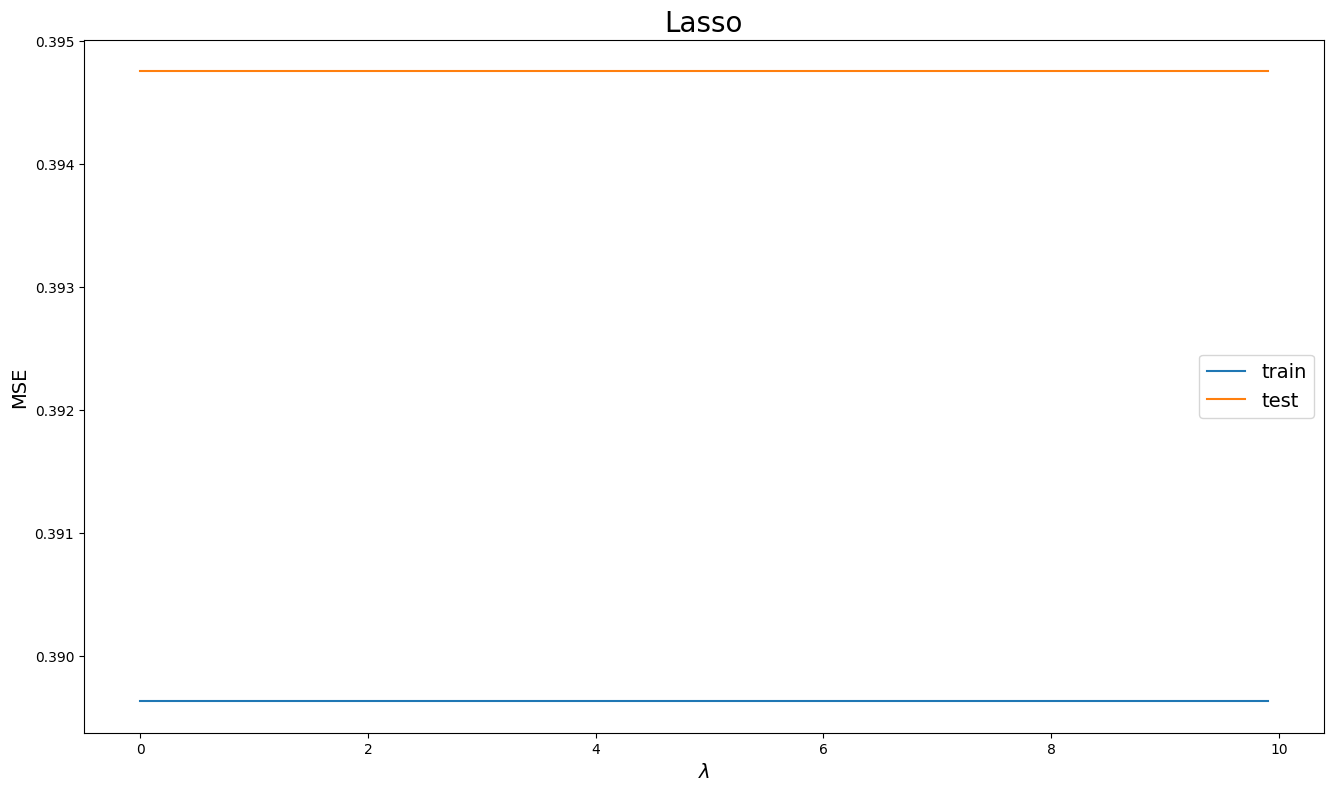

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y=load_iris(return_X_y=True)
lr=LinearRegression()
lr.fit(X, y)
predictions=lr.predict(X)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
def plot_errors(lambdas, train_errors, test_errors, title):
  plt.figure(figsize=(16,9))
  plt.plot(lambdas, train_errors, label="train")
  plt.plot(lambdas, test_errors, label="test")
  plt.xlabel("$\\lambda$",fontsize=14)
  plt.ylabel("MSE",fontsize=14)
  plt.title(title,fontsize=20)
  plt.legend(fontsize=14)
  plt.show()

def evaluate_model(Model, lambdas):
  training_errors=[]
  testing_errors=[]
  for l in lambdas:
    model=Model(alpha=1, max_iter=1000)
    model.fit(X_train, y_train)
    training_predictions=model.predict(X_train)
    training_mse=mean_squared_error(y_train,training_predictions)
    training_errors.append(training_mse)
    testing_predictions=model.predict(X_test)
    testing_mse=mean_squared_error(y_test,testing_predictions)
    testing_errors.append(testing_mse)
  return training_errors, testing_errors

lambdas=np.arange(0,10,step=0.1)
lasso_train, lasso_test=evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")
